In [6]:
!pip install tweepy

In [1]:
import pandas as pd
import tweepy
import nltk
from nltk.corpus import stopwords
from itertools import groupby   
import string
from nltk.stem import PorterStemmer

# Scrapping tweets text from twitter using twitter API and a given set of tweet ID

In [2]:
def tweet_id_text(tweet_id_data):
    #opens up the file containg labeled tweets ID
    data=[]
    with open(tweet_id_data) as cyber_hate:
        for line in cyber_hate:
            lines=line.strip()
            data.append(lines)

    tweets=[]
    for line in data:
        lines=line.split(',')
        tweet={'ID':lines[0],'label':lines[1]}
        tweets.append(tweet)
# Takes the API key and token NOTE:: the 'XXX' below should be changes to actual
# twitter API key and token

    API_key= 'XXX'
    API_key_secret= 'XXX'
    access_token= 'XXX'
    access_token_secret= 'XXX'
# initializing tweepy for scraping
    auth = tweepy.OAuthHandler(API_key, API_key_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
# Gets the text from twiter and saved in as a list of list with its corresponding label
    import time
    dataSet=[]
    sleepTime = 1
    for tweet in data1:
        try:
            tweetFetched = api.get_status(tweet["ID"])
            print("Tweet fetched" + tweetFetched.text)
            text = tweetFetched.text
            tweet=[tweet["ID"], text, tweet["label"]]
            dataSet.append(tweet)
            time.sleep(sleepTime)
        except:
            print("Inside the exception - no:2")
            continue
            df=pd.DataFrame(dataSet, columns=['ID', 'text', 'label'], index=False)
            df.to_csv('dataset_2.csv')
    return 'successfully loaded the dataset to a csv file'
# tweet_id_text('hatespeech_labels.csv')


## Loading the scarped data to a pandas dataframe

In [7]:
"""
The data was scraped from twitter and saved to a differnt CSV file 
since they contain different aspect of hate speeches 
the function below loaded all the various dataset and retures a single data frame
NOTE: the fuction recieves a list of all the dataset with their extension.
"""
# def load_data(dataset_list):
#     df=[]
#     for dataset in dataset_list:
#         data=pd.read_csv(dataset)
#         data.drop('Unnamed: 0', inplace=True, axis=1)
#         df.append(data)
#     dataframe=pd.concat(df, ignore_index=True)
#     return dataframe
    
        

# data_list=['dataset_1.csv', 'dataset_1a.csv', 'dataset_1b.csv', 'dataset_2.csv', 
#            'dataset_2a.csv','dataset_3.csv','dataset_4.csv', 'dataset_5.csv', 
#            'dataset_6.csv', 'dataset_7.csv'] 
    

# data= load_data(data_list)
# data.to_csv('CyberHateDataSat.csv', index=False)

In [10]:
data=pd.read_csv('CyberHateDataSat.csv')
data
data.head(10)

,ID,text,label
0,850490912954351616,Alex Brosas another idiot #ALDUBKSGoesToUS ht...,abusive
1,848791766853668864,"RT @ItIzBiz: as Nancy Reagan would say, 'just ...",abusive
2,850010509969465344,RT @MailOnline: The Nazi death gas so horrific...,normal
3,850433664890544128,I hate er chase because if the Bitch that work...,hateful
4,848619867506913282,RT @chevleia: don't hmu when u get tired of ur...,abusive
5,850411934205845504,RT @ashllyd: SICK OF BITCHES ON THE INTERNET 🐍...,abusive
6,850100742035836929,RT @nyctophil3: Pineapples do not belong on pi...,hateful
7,849282894682050564,But he still with the shits so he started smok...,abusive
8,848491429517295616,RT @Configa: April Fools fucking #dope If you ...,abusive
9,847804507367100416,Niggas keep talking about women wearing weave ...,hateful


# Data preprocessing

In [147]:
data['label'].unique()


array([1, 0], dtype=int64)

In [31]:
def word_removal(word):
    from itertools import groupby
    import string
    """ This function does the following preprocessing:
    1. user name removal
    2. Punctuation marks removal
    3. Special character removal
    """
    char_list=['@','http','xa0','ðŸ','$', '‰']
    word_list=str(word).split()
    bow=[word for word in word_list if all(ch not in word for ch in char_list)]
    text=' '.join(bow)
    no_puntuation= [char for char in text if char not in string.punctuation]
    words=''.join(no_puntuation)
    return words
data['text']=data['text'].apply(word_removal)


In [32]:
def replaceWord(word):
    if word == 'normal' or word=='none' or word=='spam':
        return 0
    else:
        return 1
    
    
data['label']=data['label'].apply(replaceWord)


# Data exploration and visualization

In [33]:
data.groupby('label').describe()

ID                                                          \
         count          mean           std           min           25%   
label                                                                    
0      17982.0  7.986387e+17  1.087200e+17  3.208178e+17  8.476300e+17   
1       5596.0  7.124330e+17  1.479453e+17  3.819882e+17  5.670200e+17   

                                                 
                50%           75%           max  
label                                            
0      8.487998e+17  8.497919e+17  8.508454e+17  
1      8.476281e+17  8.493012e+17  8.508443e+17

In [36]:
data['lenght']=data['text'].apply(len)
data.head()

,ID,text,label,lenght
0,850490912954351616,Alex Brosas another idiot ALDUBKSGoesToUS,1,41
1,848791766853668864,RT as Nancy Reagan would say just say FUCKING ...,1,71
2,850010509969465344,RT The Nazi death gas so horrific even Hitler ...,0,61
3,850433664890544128,I hate er chase because if the Bitch that work...,1,73
4,848619867506913282,RT dont hmu when u get tired of ur boring hoe ...,1,63


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

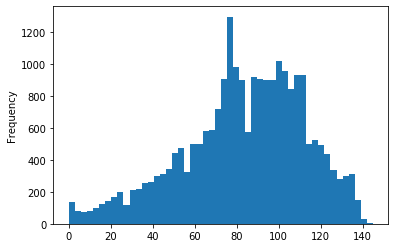

In [37]:
data['lenght'].plot.hist(bins=50)

In [38]:
data['lenght'].describe()

count    23578.000000
mean        83.494402
std         29.102532
min          0.000000
25%         66.000000
50%         86.000000
75%        105.000000
max        145.000000
Name: lenght, dtype: float64

In [39]:
data.drop(labels=data[data['lenght']==0].index, inplace=True, axis=0)
data['lenght'].describe()

count    23464.000000
mean        83.900060
std         28.583847
min          1.000000
25%         67.000000
50%         86.000000
75%        105.000000
max        145.000000
Name: lenght, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021094E9E308>,
      dtype=object)

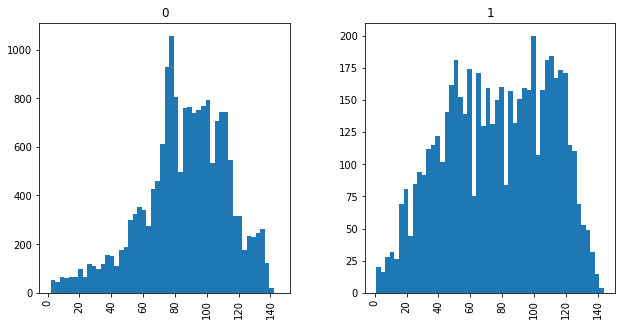

In [40]:
data.hist(column='lenght', by='label', bins=50, figsize=(10,5))

In [50]:
# def WordEncoder(word):
#     """
#     converts tweets label into a binary code of 0 and 1
#     with 1 representing hateful speech
#     and 0 representing normal speech
#     """
#     if word == 'normal': 
#         return int(0)
#     else:
#         return int(1)
# data['label']=data['label'].apply(WordEncoder)
# data['label'].head(20)

# Spliting your data into training and testing set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_set,X_test,train_lab,y_test=train_test_split(data['text'], data['label'], 
                                               test_size=0.2,random_state=101)

# Spliting the training data into training and validation set

In [49]:
X_train,X_val,y_train,y_val=train_test_split(train_set, train_lab, 
                                               test_size=0.2,random_state=101)

In [50]:
X_val.head()

20294    Thats because they were safe from elimination ...
4563     Ravi and Ashley is boring the hell out of me H...
11561    Now this is a sunset FortMyersBeach EdisonBeac...
18659    Too much drinking Too many porn stars Then the...
10483    qrnt m FAMILY ONED I vote for OneDirection You...
Name: text, dtype: object

# Vectorizing our data from scratch

### Text pre-processing (bag of words)

In [51]:
"""
writing a helper function that will remove stop words from the list of words
"""
def text_processing(word):
    """
    1. remove stop words
    2. return a list of clean text words (list of tokens)
    """
    words_list=word.split()
    clean_text=[word for word in words_list 
                if word.lower() not in stopwords.words('english')]
    return clean_text

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
train_bow_transformer=CountVectorizer(analyzer=text_processing).fit(X_train)
val_bow_transformer=CountVectorizer(analyzer=text_processing).fit(X_val)

In [54]:
print('train:', len(train_bow_transformer.vocabulary_))
print('val:', len( val_bow_transformer.vocabulary_))

train: 37840
val: 14598


In [55]:
train_bow=train_bow_transformer.transform(X_train)
val_bow=val_bow_transformer.transform(X_val)

In [56]:
print('shape of training set sparse metrix:', train_bow.shape)
print('shape of validating set sparse metrix:', val_bow.shape)

shape of training set sparse metrix: (15016, 37840)
shape of validating set sparse metrix: (3755, 14598)


In [57]:
print('no. of non zerros in traing set', train_bow.nnz)
print('no. of non zerros in validating set', val_bow.nnz)

no. of non zerros in traing set 140030
no. of non zerros in validating set 35031


In [58]:
train_sparsity = (100.0 * train_bow.nnz / (train_bow.shape[0] * train_bow.shape[1]))
val_sparsity = (100.0 * val_bow.nnz / (val_bow.shape[0] * val_bow.shape[1]))

print('training sparsity: {}'.format(round(train_sparsity, 3)))
print('validating sparsity: {}'.format(round(val_sparsity, 3)))

training sparsity: 0.025
validating sparsity: 0.064


# weigth and normalization with TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
tfidf_transform_train=TfidfTransformer().fit(train_bow)
tfidf_transform_val=TfidfTransformer().fit(val_bow)

In [61]:
train_tfidf=tfidf_transform_train.transform(train_bow)
val_tfidf=tfidf_transform_val.transform(val_bow)

## traning the model with logistic regression classifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [63]:
lm = LogisticRegression()

In [64]:
lm.fit(train_tfidf,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
"""Self evaluation to check for under fiting"""
lm_prec=lm.predict(train_tfidf)
print(classification_report(y_train,lm_prec))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93     11436
           1       0.95      0.59      0.73      3580

    accuracy                           0.90     15016
   macro avg       0.92      0.79      0.83     15016
weighted avg       0.90      0.90      0.89     15016



In [66]:
train_tfidf[0]

<1x37840 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

# using pipeline for the general process

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
LR_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)), 
                    ('tfidf', TfidfTransformer()), 
                    ('classifier', LogisticRegression())
                  ])


In [69]:
LR_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x00000210956C03A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                            

In [70]:
LR_prediction=LR_pipeline.predict(X_val)
print(classification_report(y_val,LR_prediction))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2874
           1       0.89      0.53      0.67       881

    accuracy                           0.87      3755
   macro avg       0.88      0.76      0.79      3755
weighted avg       0.88      0.87      0.86      3755



# traning the model with naive bayes classifier

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
NB_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)), 
                    ('tfidf', TfidfTransformer()), 
                    ('classifier', MultinomialNB())
                  ])


In [73]:
NB_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x00000210956C03A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [74]:
NB_predictions=NB_pipeline.predict(X_val)

In [75]:
print(classification_report(y_val,NB_predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      2874
           1       0.94      0.35      0.51       881

    accuracy                           0.84      3755
   macro avg       0.89      0.67      0.71      3755
weighted avg       0.86      0.84      0.81      3755



## Training the model with RandomForest Clas

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RF_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                  ('classifier', RandomForestClassifier(n_estimators=100,
                                                       min_samples_split=50,
                                                       random_state=1))
                  ])

In [78]:
RF_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x00000210956C03A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [79]:
RF_predictions=RF_pipeline.predict(X_val)

In [80]:
print(classification_report(y_val,RF_predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2874
           1       0.86      0.78      0.82       881

    accuracy                           0.92      3755
   macro avg       0.90      0.87      0.88      3755
weighted avg       0.92      0.92      0.92      3755



## Training an SVM model

In [81]:
from sklearn import svm

In [82]:
karnels=['linear','sigmoid', 'rbf']
for karnel in karnels:
    Svm_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                           ('tfidf', TfidfTransformer()),
                           ('classifier', svm.SVC(kernel=karnel))
                          ])
    Svm_pipeline.fit(X_train,y_train)
    prediction=Svm_pipeline.predict(X_val)
    print(classification_report(y_val,prediction))
    
    
    
    

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2874
           1       0.87      0.70      0.78       881

    accuracy                           0.91      3755
   macro avg       0.89      0.84      0.86      3755
weighted avg       0.90      0.91      0.90      3755

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2874
           1       0.87      0.66      0.75       881

    accuracy                           0.90      3755
   macro avg       0.89      0.81      0.84      3755
weighted avg       0.90      0.90      0.89      3755

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2874
           1       0.91      0.68      0.77       881

    accuracy                           0.91      3755
   macro avg       0.91      0.83      0.86      3755
weighted avg       0.91      0.91      0.90      3755



In [83]:
""" it was observed that 'rbf' kernal performed best"""

" it was observed that 'rbf' kernal performed best"

## LightGBM Model Development and Training

In [84]:
!pip install --upgrade pip

In [85]:
!pip install lightgbm

In [86]:
import lightgbm as lgb

In [87]:
 lgb_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                 ('classifier', lgb.LGBMClassifier(learning_rate=0.1, 
                                                   max_depth=-5, 
                                                   random_state=42))
                       ])

In [88]:
lgb_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x00000210956C03A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_j

In [89]:
lgb_predictions=lgb_pipeline.predict(X_val)

In [90]:
print(classification_report(y_val,lgb_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2874
           1       0.81      0.61      0.70       881

    accuracy                           0.87      3755
   macro avg       0.85      0.78      0.81      3755
weighted avg       0.87      0.87      0.87      3755



## Using XGBOOST MODEL

In [91]:
import xgboost
from xgboost import XGBClassifier

In [92]:
xgb_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                  ('classifier', XGBClassifier(random_state=1, 
                                               learning= .1, 
                                               n_estimators=200,
                                               max_depths=5,
                                               subsample=0.5,
                                               colsample=0.5,
                                               eval_metric='auc',
                                               verbosity=1))
                  ])

In [93]:
xgb_pipeline.fit(X_train,y_train)

[13:32:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample", "learning", "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x00000210956C03A8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning=0.1, learning_rate=0.300000012,
                               max_bin=256, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_depths=5

In [94]:
xgb_prediction=xgb_pipeline.predict(X_val)

In [95]:
print(classification_report(y_val,xgb_prediction))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2874
           1       0.82      0.63      0.71       881

    accuracy                           0.88      3755
   macro avg       0.86      0.80      0.82      3755
weighted avg       0.88      0.88      0.88      3755



## Training the model with training and validation dataset combined and testing it on the testing set

In [107]:
import time
pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer())])
start=time.time()
pipeline.fit(train_set,train_lab)
training_vector_time=time.time()-start
start=time.time()
pipeline.fit(X_test)
testing_vector_time=time.time()-start
print(training_vector_time, testing_vector_time)

69.40073108673096 17.403791904449463


In [108]:

"""Linear logistic model"""
LR_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)), 
                    ('tfidf', TfidfTransformer()), 
                    ('classifier', LogisticRegression())
                  ])
train_time=time.time()
LR_pipeline.fit(train_set,train_lab)
print("LR training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
LR_prediction=LR_pipeline.predict(X_test)
print('LR prediction time:', (time.time()-prediction_time)-testing_vector_time)
print(classification_report(y_test,LR_prediction))

LR training time: -1.410649299621582
LR prediction time: -0.3581509590148926
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3562
           1       0.89      0.56      0.69      1131

    accuracy                           0.88      4693
   macro avg       0.88      0.77      0.81      4693
weighted avg       0.88      0.88      0.87      4693



In [109]:
"""Naive base model"""
NB_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)), 
                    ('tfidf', TfidfTransformer()), 
                    ('classifier', MultinomialNB())
                  ])
train_time=time.time()
NB_pipeline.fit(train_set,train_lab)
print("NB training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
NB_prediction=NB_pipeline.predict(X_test)
print('LR prediction time:', (time.time()-prediction_time)-testing_vector_time)

print(classification_report(y_test,NB_prediction))

NB training time: -2.034224271774292
LR prediction time: -0.5238842964172363
              precision    recall  f1-score   support

           0       0.83      0.99      0.91      3562
           1       0.96      0.37      0.54      1131

    accuracy                           0.84      4693
   macro avg       0.89      0.68      0.72      4693
weighted avg       0.86      0.84      0.82      4693



In [110]:
"""Random forest model"""
RF_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                  ('classifier', RandomForestClassifier(n_estimators=100,
                                                       min_samples_split=50,
                                                       random_state=1))
                  ])
train_time=time.time()
RF_pipeline.fit(train_set,train_lab)
print("RF training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
RF_prediction=RF_pipeline.predict(X_test)
print('RF prediction time:', (time.time()-prediction_time)-testing_vector_time)

print(classification_report(y_test,RF_prediction))

RF training time: 10.926318168640137
RF prediction time: 1.9575979709625244
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3562
           1       0.88      0.83      0.85      1131

    accuracy                           0.93      4693
   macro avg       0.91      0.89      0.90      4693
weighted avg       0.93      0.93      0.93      4693



In [111]:
"""SVM model"""
svm_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                  ('classifier', svm.SVC(kernel='rbf'))
                  ])
train_time=time.time()
svm_pipeline.fit(train_set,train_lab)
print("svm training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
svm_prediction=svm_pipeline.predict(X_test)
print('svm prediction time:', (time.time()-prediction_time)-testing_vector_time)

print(classification_report(y_test,svm_prediction))

svm training time: 76.78254270553589
svm prediction time: 5.557945489883423
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3562
           1       0.93      0.71      0.80      1131

    accuracy                           0.92      4693
   macro avg       0.92      0.85      0.88      4693
weighted avg       0.92      0.92      0.91      4693



In [112]:
"""lightgbm model"""
lgb_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                 ('classifier', lgb.LGBMClassifier(learning_rate=0.1, 
                                                   max_depth=-5, 
                                                   random_state=42))
                       ])
train_time=time.time()
lgb_pipeline.fit(train_set,train_lab)
print("lgb training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
lgb_prediction=lgb_pipeline.predict(X_test)
print('lgb prediction time:', (time.time()-prediction_time)-testing_vector_time)

print(classification_report(y_test,lgb_prediction))

lgb training time: 0.07366561889648438
lgb prediction time: 0.18191170692443848
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3562
           1       0.84      0.66      0.74      1131

    accuracy                           0.89      4693
   macro avg       0.87      0.81      0.83      4693
weighted avg       0.89      0.89      0.88      4693



In [113]:
"""XG boost model"""
xgb_pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_processing)),
                  ('tfidf', TfidfTransformer()),
                  ('classifier', XGBClassifier(random_state=1, 
                                               learning= .1, 
                                               n_estimators=200,
                                               max_depths=5,
                                               subsample=0.5,
                                               colsample=0.5,
                                               eval_metric='auc',
                                               verbosity=1))
                  ])
train_time=time.time()
xgb_pipeline.fit(train_set,train_lab)
print("xgm training time:", (time.time()-train_time)-training_vector_time)


prediction_time=time.time()
xgb_prediction=xgb_pipeline.predict(X_test)
print('xgm prediction time:', (time.time()-prediction_time)-testing_vector_time)

print(classification_report(y_test,xgb_prediction))

[16:27:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample", "learning", "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


xgm training time: 4.40308952331543
xgm prediction time: -0.26681995391845703
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3562
           1       0.85      0.65      0.74      1131

    accuracy                           0.89      4693
   macro avg       0.87      0.81      0.83      4693
weighted avg       0.89      0.89      0.88      4693



In [117]:
import numpy as np
X=['Logistic Regression','Multinomial NB',
   'Random Forest','SVM','LGBM Classifier','XG boost model']
Acuracy=[0.88,0.84,0.93,0.92,0.89,0.89]
precision=[0.88,0.86,0.93,0.92,0.89,0.89]
recall=[0.88,0.84,0.93,0.92,0.89,0.89]
F1_Score=[0.87,0.82,0.93,0.91,0.88,0.88]


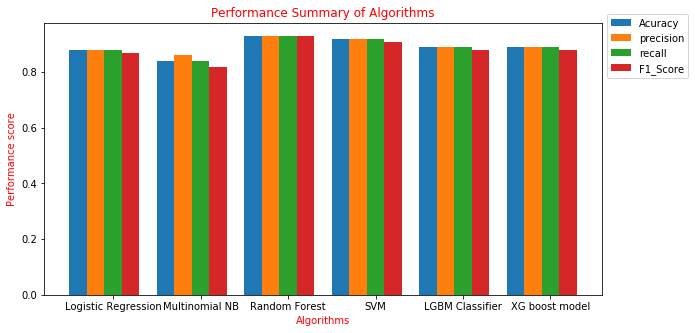

In [131]:
plt.figure(figsize=(10,5))
X_axis=np.arange(len(X))
plt.bar(X_axis-0.4, Acuracy, 0.2, label='Acuracy')
plt.bar(X_axis-0.2, precision, 0.2, label='precision')
plt.bar(X_axis, recall, 0.2, label='recall')
plt.bar(X_axis+0.2, F1_Score, 0.2, label='F1_Score')
plt.xticks(X_axis, X)
plt.xlabel('Algorithms', color='r')
plt.ylabel('Performance score', color='r')
plt.title('Performance Summary of Algorithms', color='r')
plt.legend(bbox_to_anchor=(1,1.05))


Text(0.5, 1.0, 'Performance Based on F1_score')

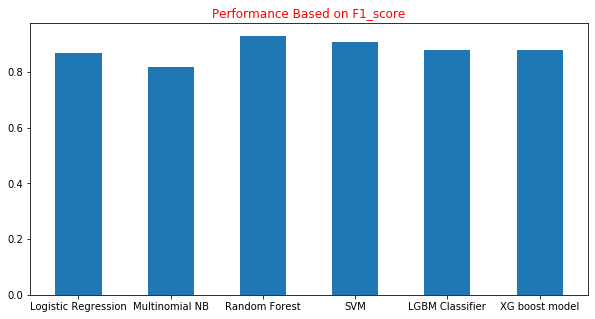

In [144]:
plt.figure(figsize=(10,5))
plt.bar(X,F1_Score, 0.5)
plt.title('Performance Based on F1_score', color='r')
